<a href="https://colab.research.google.com/github/rajesh0305/Module3-Natural-language-processing-/blob/main/Implementation_of_Naive_Bayes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of the Naive bayes classification **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/implementation_of_navie_bayes/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
df.size

11144

In [133]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [134]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.5)

In [136]:
print("the size of the x_train is =",x_train.size)
print("the size of the x_test is =",x_test.size)
print("the size of the y_train is =",y_train.size)
print("the size of the y_test is =",y_test.size)

the size of the x_train is = 2786
the size of the x_test is = 2786
the size of the y_train is = 2786
the size of the y_test is = 2786


In [137]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [138]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha = 0.5,class_prior = None,fit_prior = True)
model.fit(x_train_count,y_train)

MultinomialNB(alpha=0.5)

In [139]:
emails_count = v.transform(x_test)
y_predict = model.predict(emails_count)
from sklearn.metrics import confusion_matrix
# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_train, y_predict)


array([[2102,  319],
       [ 322,   43]])

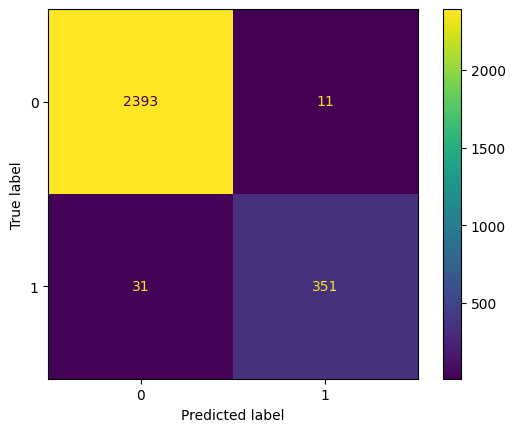

In [140]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# y_pred = clf.predict(x_test)
emailscount = v.transform(x_test)
y_pred = model.predict(emailscount)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

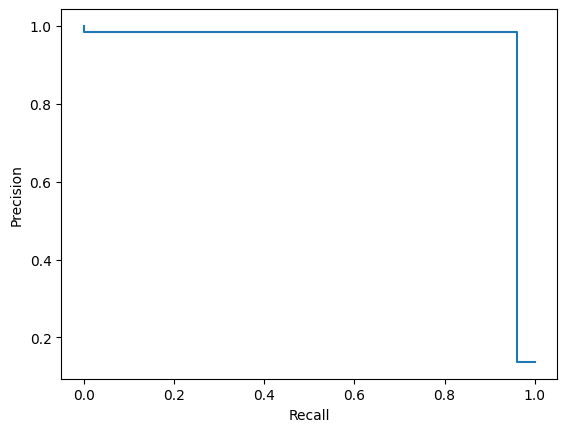

In [151]:
# from sklearn.metrics import RocCurveDisplay, roc_curve
# emails_count = v.transform(x_test)
# y_predict = model.predict(emails_count)
# y_score = model.predict(y_predict)

# fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


import matplotlib.pyplot as plt

from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# Calculate precision and recall values using precision_recall_curve
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=model.classes_[1])

# Create a Precision-Recall curve display object
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

# Plot the Precision-Recall curve
pr_display.plot()

# Optionally show the plot
plt.show()

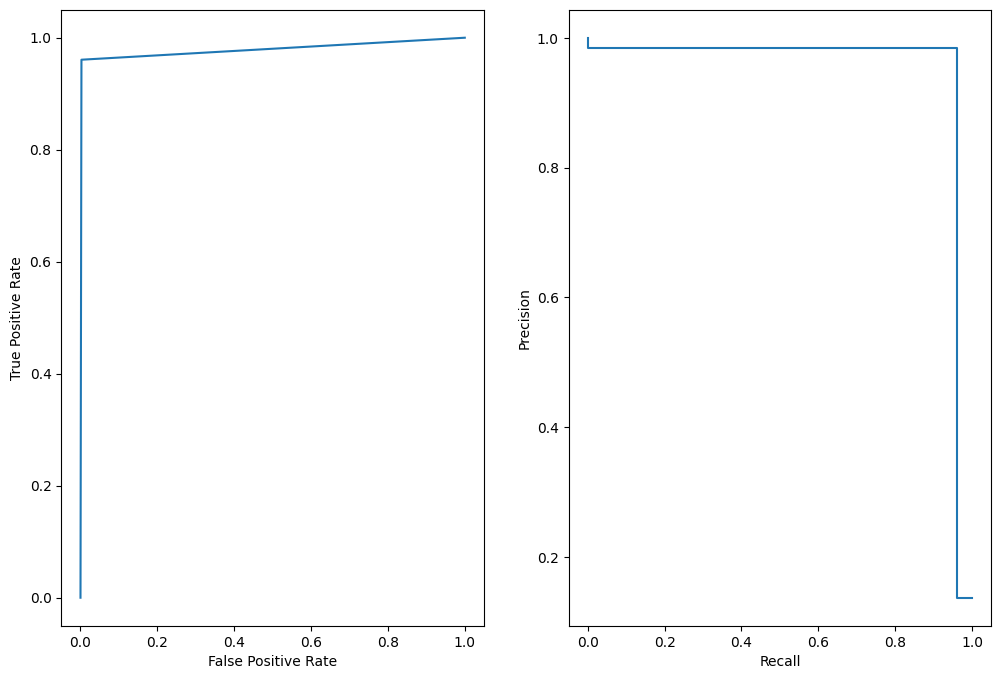

In [143]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [146]:
from sklearn.metrics import classification_report
emails_count = v.transform(x_test)
y_predict = model.predict(emails_count)
# y_pred = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2404
           1       0.97      0.92      0.94       382

    accuracy                           0.98      2786
   macro avg       0.98      0.96      0.97      2786
weighted avg       0.98      0.98      0.98      2786



In [145]:

emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [ ]:
x_test_count = v.transform(x_test)
model.score(x_test_count, y_test)

0.994256999282125

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(x_test,y_test)

0.9899497487437185

In [ ]:
clf.predict(emails)

array([0, 1])